In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint
from lime.lime_tabular import LimeTabularExplainer

In [81]:
# Load the dataset
df = pd.read_csv('day.csv')

# Select relevant features (excluding 'mnth' to avoid trivial classification)
features = ['temp', 'hum', 'windspeed', 'holiday', 'weathersit', 'yr', 'weekday', 'cnt']
target = 'season'

X = df[features]
y = df[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred_prob = model.predict_proba(X=X_train)
y_test_pred_prob = model.predict_proba(X_test)


In [82]:
# Correlation
# Select only numeric columns for correlation
numeric_data = X.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Print the correlation matrix
print(correlation_matrix)


                temp       hum  windspeed   holiday  weathersit        yr  \
temp        1.000000  0.126963  -0.157944 -0.028556   -0.120602  0.047604   
hum         0.126963  1.000000  -0.248489 -0.015937    0.591045 -0.110651   
windspeed  -0.157944 -0.248489   1.000000  0.006292    0.039511 -0.011817   
holiday    -0.028556 -0.015937   0.006292  1.000000   -0.034627  0.007954   
weathersit -0.120602  0.591045   0.039511 -0.034627    1.000000 -0.048727   
yr          0.047604 -0.110651  -0.011817  0.007954   -0.048727  1.000000   
weekday    -0.000170 -0.052232   0.014282 -0.101960    0.031087 -0.005461   
cnt         0.627494 -0.100659  -0.234545 -0.068348   -0.297391  0.566710   

             weekday       cnt  
temp       -0.000170  0.627494  
hum        -0.052232 -0.100659  
windspeed   0.014282 -0.234545  
holiday    -0.101960 -0.068348  
weathersit  0.031087 -0.297391  
yr         -0.005461  0.566710  
weekday     1.000000  0.067443  
cnt         0.067443  1.000000  


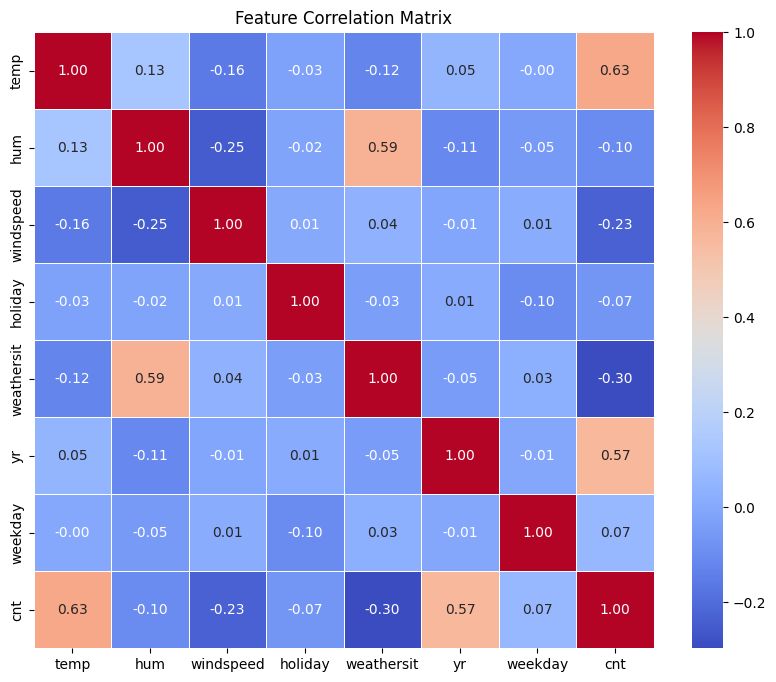

In [83]:
# Compute and visualize the correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# BUILT-IN

## Train Model

In [84]:
# Evaluate the model

# Accuracy, Precision, Recall, sensitivity, F-measure, AUC, AUPRC
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
test_precision = precision_score(y_test, y_test_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Binarize the output for multiclass ROC-AUC and AUPRC computation
y_train_binarized = label_binarize(y_train, classes=np.unique(y))
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# AUC (Area Under the ROC Curve)
train_auc_score = roc_auc_score(y_train_binarized, y_train_pred_prob, multi_class='ovr')
test_auc_score = roc_auc_score(y_test_binarized, y_test_pred_prob, multi_class='ovr')

# AUPRC (Area Under the Precision-Recall Curve)
train_auprc_score = average_precision_score(y_train_binarized, y_train_pred_prob, average='macro')
test_auprc_score = average_precision_score(y_test_binarized, y_test_pred_prob, average='macro')

print("Training Metrics:")
print("Accuracy:", train_accuracy)
print("Precision (Macro):", train_precision)
print("Recall (Sensitivity):", train_recall)
print("F1-Score (Macro):", train_f1)
print("AUC (ROC):", train_auc_score)
print("AUPRC:", train_auprc_score)

print("\nTesting Metrics:")
print("Accuracy:", test_accuracy)
print("Precision (Macro):", test_precision)
print("Recall (Sensitivity):", test_recall)
print("F1-Score (Macro):", test_f1)
print("AUC (ROC):", test_auc_score)
print("AUPRC:", test_auprc_score)

target_names = ['spring', 'summer', 'fall', 'winter']
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, target_names=target_names))


Training Metrics:
Accuracy: 0.7294520547945206
Precision (Macro): 0.7224141361566541
Recall (Sensitivity): 0.7311305246348223
F1-Score (Macro): 0.7243111382858224
AUC (ROC): 0.9086941330913895
AUPRC: 0.7761981551911112

Testing Metrics:
Accuracy: 0.7346938775510204
Precision (Macro): 0.7189324417111981
Recall (Sensitivity): 0.7239660114660116
F1-Score (Macro): 0.7183294451013604
AUC (ROC): 0.8808242050125965
AUPRC: 0.7168953787283652

Classification Report:
               precision    recall  f1-score   support

      spring       0.79      0.85      0.82        40
      summer       0.56      0.42      0.48        33
        fall       0.84      0.86      0.85        37
      winter       0.68      0.76      0.72        37

    accuracy                           0.73       147
   macro avg       0.72      0.72      0.72       147
weighted avg       0.72      0.73      0.73       147



| **Metric**             | **Training** | **Testing** | **Difference (Test - Train)** |
|-----------------------|--------------|-------------|-------------------------------|
| Accuracy              | 0.7295       | 0.7347      | +0.0052                       |
| Precision (Macro)     | 0.7224       | 0.7189      | -0.0035                       |
| Recall (Sensitivity)  | 0.7311       | 0.7240      | -0.0071                       |
| F1-Score (Macro)      | 0.7243       | 0.7183      | -0.0060                       |
| ROC-AUC               | 0.9087       | 0.8808      | -0.0279                       |
| AUPRC                 | 0.7762       | 0.7169      | -0.0593                       |


# Model Evaluation Metrics Explanation

### 1. Accuracy

Definition: The proportion of correctly predicted instances over the total instances.

Use Case: Best suited for balanced datasets where all classes have similar representation.

Formula:

    Accuracy = (True Positives + True Negatives) / Total Predictions
​

### 2. Precision

Definition: The ratio of correctly predicted positive observations to the total predicted positive observations.

Use Case: Useful when the cost of false positives is high (e.g., medical diagnoses, fraud detection).

Formula:

    Precision = True Positives / (True Positives + False Positives)


### 3. Recall (Sensitivity)

Definition: The ratio of correctly predicted positive observations to all actual positive observations.

Use Case: Important when missing a positive instance has a high cost (e.g., disease detection).

Formula:

    Recall = True Positives / (True Positives + False Negatives)

 
### 4. F1-Score

Definition: The harmonic mean of precision and recall, balancing both metrics.

Use Case: Useful when you need a balance between precision and recall, especially in imbalanced datasets.

Formula:

    F1-Score = 2 × (Precision × Recall) / (Precision + Recall)

 
### 5. ROC-AUC (Receiver Operating Characteristic - Area Under Curve)

Definition: Measures the model's ability to distinguish between classes. Higher AUC indicates better performance.

Use Case: Ideal for binary and multiclass classification tasks.

Interpretation:

    1.0: Perfect classification
    0.5: No discriminative power (random guessing)


### 6. AUPRC (Area Under the Precision-Recall Curve)

Definition: Represents the trade-off between precision and recall for different thresholds.

Use Case: More informative than ROC-AUC for imbalanced datasets.

Interpretation: 

    A higher AUPRC indicates better model performance, especially on minority classes.



In [85]:
# Perform Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold

# Scale the features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [86]:
# Cross-validation predictions and scores
cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
y_pred_cv = cross_val_predict(model, X_scaled, y, cv=kf)
y_pred_prob_cv = cross_val_predict(model, X_scaled, y, cv=kf, method='predict_proba')

# Binarize the output for multiclass ROC-AUC and AUPRC computation
y_binarized = label_binarize(y, classes=np.unique(y))

# Evaluate cross-validation predictions
cv_accuracy = accuracy_score(y, y_pred_cv)
cv_precision = precision_score(y, y_pred_cv, average='macro')
cv_recall = recall_score(y, y_pred_cv, average='macro')
cv_f1 = f1_score(y, y_pred_cv, average='macro')
cv_auc_score = roc_auc_score(y_binarized, y_pred_prob_cv, multi_class='ovr')
cv_auprc_score = average_precision_score(y_binarized, y_pred_prob_cv, average='macro')

# Print Cross-Validation Metrics
print("Cross-Validation Metrics:")
print("Mean Accuracy (5-Fold):", np.mean(cv_scores))
print("Overall Accuracy:", cv_accuracy)
print("Precision (Macro):", cv_precision)
print("Recall (Sensitivity):", cv_recall)
print("F1-Score (Macro):", cv_f1)
print("AUC (ROC):", cv_auc_score)
print("AUPRC:", cv_auprc_score)



Cross-Validation Metrics:
Mean Accuracy (5-Fold): 0.7044730220855465
Overall Accuracy: 0.7045143638850889
Precision (Macro): 0.6952805074960802
Recall (Sensitivity): 0.7039703455655846
F1-Score (Macro): 0.6963250857993364
AUC (ROC): 0.8937598053472465
AUPRC: 0.7376324657141288


### 1. Logistic Regression Sensitivity to Feature Scale

- Logistic Regression computes coefficients for each feature.
- If features are on different scales, those with larger ranges (e.g., temp or windspeed) can dominate the learning process.
- Scaling ensures all features contribute equally to the model.


### 2. Improved Model Convergence
- Logistic Regression uses optimization algorithms like Gradient Descent, which perform better when input features are scaled.
- Without scaling, the algorithm may take longer to converge or fail to find the optimal solution.


### 3. Balanced Distance Metrics
- Metrics like Euclidean distance (used internally by models) are sensitive to feature scales.
- Scaling ensures that the distance between data points is not skewed by large-valued features.


### 4. Better Performance in Cross-Validation
- During cross-validation, the model is trained on different subsets of data.
- Scaling prevents variations in feature scales from introducing bias across folds.


## Why StandardScaler Specifically?

- StandardScaler standardizes features by removing the mean and scaling to unit variance:

        𝑋scaled = (𝑋 − 𝜇)/𝜎

- This method ensures each feature has a mean of 0 and standard deviation of 1, making it suitable for logistic regression.



In [87]:
# Residuals calculation
train_residuals = y_train_binarized - y_train_pred_prob
test_residuals = y_test_binarized - y_test_pred_prob

# Residual Standard Deviation
train_residual_std = np.std(train_residuals)
test_residual_std = np.std(test_residuals)

print(f"Probability differences standard dev {train_residual_std}")
print(f"Probability differences standard dev {test_residual_std}")

Probability differences standard dev 0.3094382405611285
Probability differences standard dev 0.3233746539475113


In [88]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
n = len(y_test)  # Total number of samples

# Calculate 95% Confidence Interval for accuracy
ci_low, ci_high = proportion_confint(count=int(accuracy * n), nobs=n, alpha=0.05, method='normal')

print(f"Accuracy: {accuracy:.2f}")
print(f"95% Confidence Interval for Accuracy: ({ci_low:.2f}, {ci_high:.2f})")

Accuracy: 0.73
95% Confidence Interval for Accuracy: (0.66, 0.81)


### Residuals Calculation

    train_residuals = y_train_binarized - y_train_pred_prob
    test_residuals = y_test_binarized - y_test_pred_prob

- Residuals are the differences between the true labels and the predicted probabilities.
In classification tasks, this measures how far the model's predicted probabilities deviate from the actual outcomes.

- Interpretation:

    - Small residuals → The model is making confident and correct predictions.
    - Large residuals → The model's predicted probabilities are far off from the actual class.


### Residual Standard Deviation

    train_residual_std = np.std(train_residuals)
    test_residual_std = np.std(test_residuals)

- The standard deviation of the residuals measures the spread or variability in the prediction errors.

- Interpretation:

    - Low standard deviation → Predictions are consistently close to the actual outcomes.
    - High standard deviation → Predictions are inconsistent and vary widely.


### 95% Confidence Interval for Accuracy

    ci_low, ci_high = proportion_confint(count=int(accuracy * n), nobs=n, alpha=0.05, method='normal')

- This computes the confidence interval (CI) for the model's accuracy.
A 95% CI gives a range where we are 95% confident that the true accuracy of the model lies.

- Interpretation:

    - If the CI is narrow, the model's performance estimate is reliable.
    - If the CI is wide, the accuracy estimate is less precise.

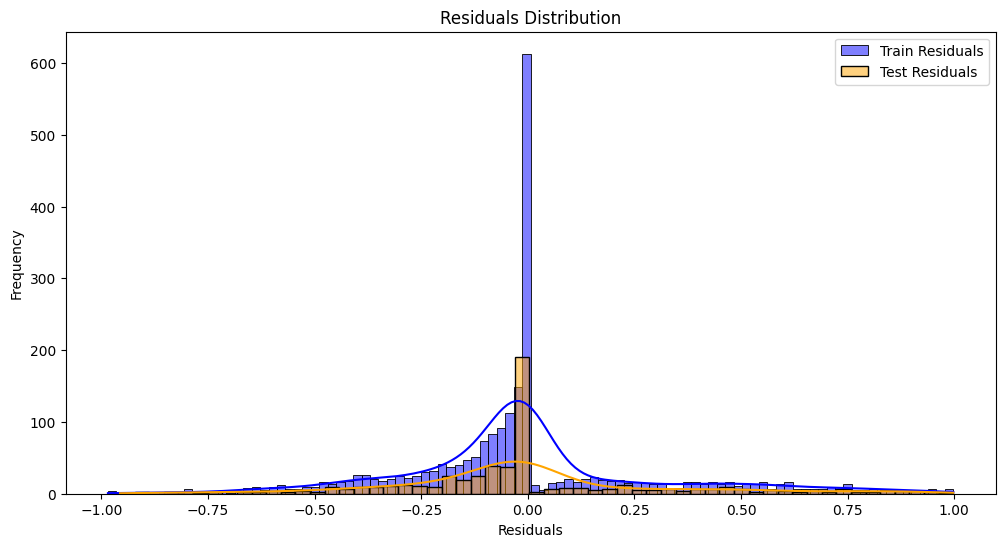

In [89]:
# Plot residual distributions
plt.figure(figsize=(12, 6))
sns.histplot(train_residuals.flatten(), kde=True, color="blue", label="Train Residuals")
sns.histplot(test_residuals.flatten(), kde=True, color="orange", label="Test Residuals")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Interpretation of the Plot

### Centering Around Zero

- Both Train (blue) and Test (orange) residuals are centered around 0, which is ideal.
- This suggests that the model does not systematically overpredict or underpredict.

### Residual Spread

- The train residuals have a sharper peak at zero and a tighter spread, indicating that the model fits the training data well.
- The test residuals have a wider spread, suggesting the model performs slightly worse on unseen data (expected behavior to some extent).

### Symmetry

- The residuals appear symmetrical, meaning errors are evenly distributed, which is a positive sign.
- If the plot was skewed, it would suggest bias in the predictions.

### Heavy Tails

- Both distributions show tails extending in both directions, which might indicate that the model occasionally makes large errors.
- This could hint at outliers or complex patterns not captured by the model.

### Overfitting Check

- A sharper peak for the training residuals but a wider spread for testing residuals might suggest mild overfitting.
- However, since the test residuals are not dramatically worse, this isn't severe.

